In [373]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
from IPython.display import display
from PIL import Image

# Phase1
# read image

In [374]:
img = cv.imread('3.png',cv.IMREAD_GRAYSCALE)
# img = cv.cvtColor(img,cv2.COLOR_BGR2RGB)
# img = np.array(Image.open("adab.jpg"))

In [375]:
# plt.imshow(img)
# plt.show()
# display(Image.fromarray(img))

# Phase 2
# binarize

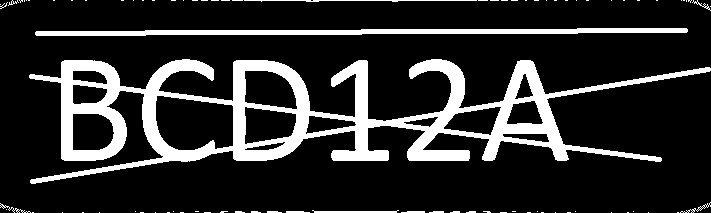

In [376]:
img_bw = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,23,10)
display(Image.fromarray(img_bw))

# Phase 3
# Morphology | Noise reduction

In [377]:
kern1 = np.ones((8,8),np.uint8)
opening = cv.morphologyEx(img_bw,cv.MORPH_OPEN,kern1)
kern2 = np.ones((4,4),np.uint8)
opening = cv.dilate(opening,kern2)
kern2

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

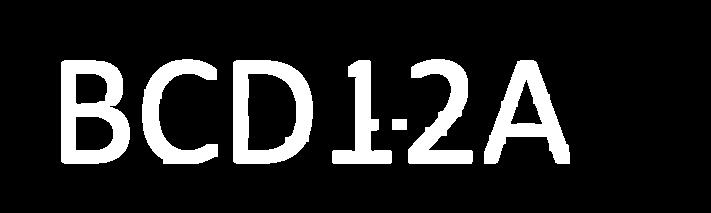

In [378]:
display(Image.fromarray(opening))

# Phase 4
# extract letters and digits using contours

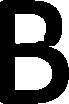

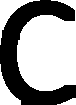

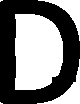

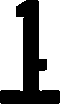

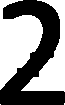

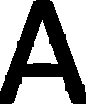

In [379]:
contours, hierarchy = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 

sorted_ctrs = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])

letters = []
for i in range(len(sorted_ctrs)):
    cnt = sorted_ctrs[i]
    area = cv.contourArea(cnt)
    if area>2000:
#         cv.drawContours(opening, contours, -1, (0,255,0), 3)
        x,y,w,h = cv.boundingRect(cnt)
    
#        epsilon = min(h, w) * 0.008
#        vertices = cv.approxPolyDP(cnt, epsilon, True)
#        print(len(vertices))
        
        croped = cv.bitwise_not(opening[y:y+h, x:x+w])
        letters.append(croped)
        display(Image.fromarray(croped))
letters = np.asarray(letters)


# Phase -1
# extract labled images for detection
# resize them to a standard size for comparison

In [380]:
# for i in range(7):
#     resized = cv.resize(letters[i], (100,180), interpolation = cv.INTER_AREA)
#     cv.imwrite("./Labeled_images/labled"+str(i)+".png",resized)

# Phase 5
# compare extracted letters to labeled images from phase -1

In [382]:
labeled = []
captcha = ""
for k in range(7):
    labeled.append(cv.imread("./Labeled_images/labled"+str(k)+".png",cv.IMREAD_GRAYSCALE))
for i in range(len(letters)):
    resized = cv.resize(letters[i], (100,180), interpolation = cv.INTER_AREA)
    for j in range(len(labeled)):
        sub = abs(labeled[j]-resized)
        sub = sub.sum()
        if(sub<190000):
            if(j==0):
                captcha = captcha+"A"
            elif(j==1):
                captcha = captcha+"B"
            elif(j==2):
                captcha = captcha+"C"
            elif(j==3):
                captcha = captcha+"D"
            elif(j==4):
                captcha = captcha+"1"
            elif(j==5):
                captcha = captcha+"2"
            elif(j==6):
                captcha = captcha+"3"
print(captcha)

BCD12A
